# **Group Project Report (G27)**

# **1. Introduction**

## 1.1 Background Information

A term deposit is a fixed-term investment where clients deposit their money into a bank account and is usually short-term (Chen, 2021). It is one of the most important services provided by banks as it brings benefits to both parties, the customers and the banks. Customers are able to gain interest safely while the bank has the opportunity to gain a better return than the promised interest rate. Through this group project, we strive to answer the question, **Who are most likely to subscribe to a term deposit?** To answer this question, we use the Bank Marketing Data Set. This data set is based on a telemarketing campaign done by a Portuguese bank, which hopes to identify which customers would agree to subscribe to a term deposit. It has 4521 instances, 16 attributes and 1 output variable (y), the agreement or disagreement to a term deposit.

To answer the predicted question, there are two considerable approaches, one based on the client’s attribute and the other based on the marketing method of the bank. To make the result more objective and generally applicable to all cases, we chose to investigate the client’s attribute.

## 1.2 Variables Selection and Description

We select **age, balance, and campaign** from client’s attributes. Balance indicates the amount of money that is available in one’s account. Campaign indicates the number of contacts performed during this campaign and for this client. 

These three numeric attributes are representative to answer our prediction question. 
Age, as the most direct index to divide the population into groups, could assist to reflect the asset level of different groups. Besides, different age groups have different life status, which would affect their decision on subscription as well. Overall, age could be an effective attribute to predict which age group is more likely to subscribe to a term deposit.
 
The subscription on term deposit requires a large amount of balance to a certain extent. The definition of a large amount of balance is not absolute, instead, it is based on the life status of each individual. Therefore, the attribute of balance could be based on the age group when investigating.

The number of contacts performed during the current campaign of each client (“campaign”) could indicate whether each client is willing to contact the bank or not. The number of contacts could not only be concluded as a marketing strategy, but also reflect if the client pays close attention to bank activities or not. This attribute directly links to their decision on the subscription of term deposit.

# **2. Preliminary Exploratory Data Analysis**

## 2.1 General exploration

In [13]:
#load the packages needed
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(httr)
library(jsonlite)
library(ggplot2)
library(GGally)
library(forcats)

#set to show 10 rows of data
options(repr.matrix.max.rows = 10)

In [14]:
# read in data
# unzip the data file and use the read_csv2 function to read it into R
# mutate the column y as it's our factor for classification.
BANK_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
GET(BANK_URL, write_disk(bk <- tempfile(fileext = ".zip")))

bank_data <- read_csv2(unz(bk, "bank.csv")) %>%
            mutate(y = as_factor(y))
bank_data

# remove the temporary file
unlink(bk)

# The data set was created in a tidy format so there was no need to wrangle it. 

Response [https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip]
  Date: 2021-08-14 10:12
  Status: 200
  Content-Type: application/x-httpd-php
  Size: 579 kB
<ON DISK>  /tmp/Rtmpd4KCYg/file6b69a3f0e5.zipNULL

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  age = col_double(),
  job = col_character(),
  marital = col_character(),
  education = col_character(),
  default = col_character(),
  balance = col_double(),
  housing = col_character(),
  loan = col_character(),
  contact = col_character(),
  day = col_double(),
  month = col_character(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  poutcome = col_character(),
  y = col_character()
)



age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no


In [15]:
# To avoid an overwhelming amount of unnecessary data, we select only the four columns related to our question.
bank_data_selected <- bank_data %>%
    select(age, balance, campaign,y)
bank_data_selected

age,balance,campaign,y
<dbl>,<dbl>,<dbl>,<fct>
30,1787,1,no
33,4789,1,no
35,1350,1,no
30,1476,4,no
59,0,1,no
⋮,⋮,⋮,⋮
33,-333,5,no
57,-3313,1,no
57,295,11,no


In [16]:
summary(bank_data_selected)

      age           balance         campaign        y       
 Min.   :19.00   Min.   :-3313   Min.   : 1.000   no :4000  
 1st Qu.:33.00   1st Qu.:   69   1st Qu.: 1.000   yes: 521  
 Median :39.00   Median :  444   Median : 2.000             
 Mean   :41.17   Mean   : 1423   Mean   : 2.794             
 3rd Qu.:49.00   3rd Qu.: 1480   3rd Qu.: 3.000             
 Max.   :87.00   Max.   :71188   Max.   :50.000             

> Based on the summary, we discover a class imbalance problem, where "no" accounts for around 88% while "yes" only accounts for around 11%. To avoid later problems in classification, we will overfit yes in the later process. In addition, we observe that there is a lot of variance among predictors. This may pose difficulties in our later classification as the data might be a bit spread out.

In [17]:
# set the seed as we want to make sure the results are reproducible.
set.seed(42)

# We split the data into training sets and testing sets as we only want to train the training data for future predictions
# split data portion: 60% for training, 40% for testing, see methods for reasoning
bank_split <- initial_split(bank_data_selected, prop = 0.6, strata = y)
bank_train <- training(bank_split)
bank_test <- testing(bank_split)

Warning message in warn_deprecated(!missing(legends), "legends"):
“'legends' will be deprecated in future versions.  Please remove it from your code”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



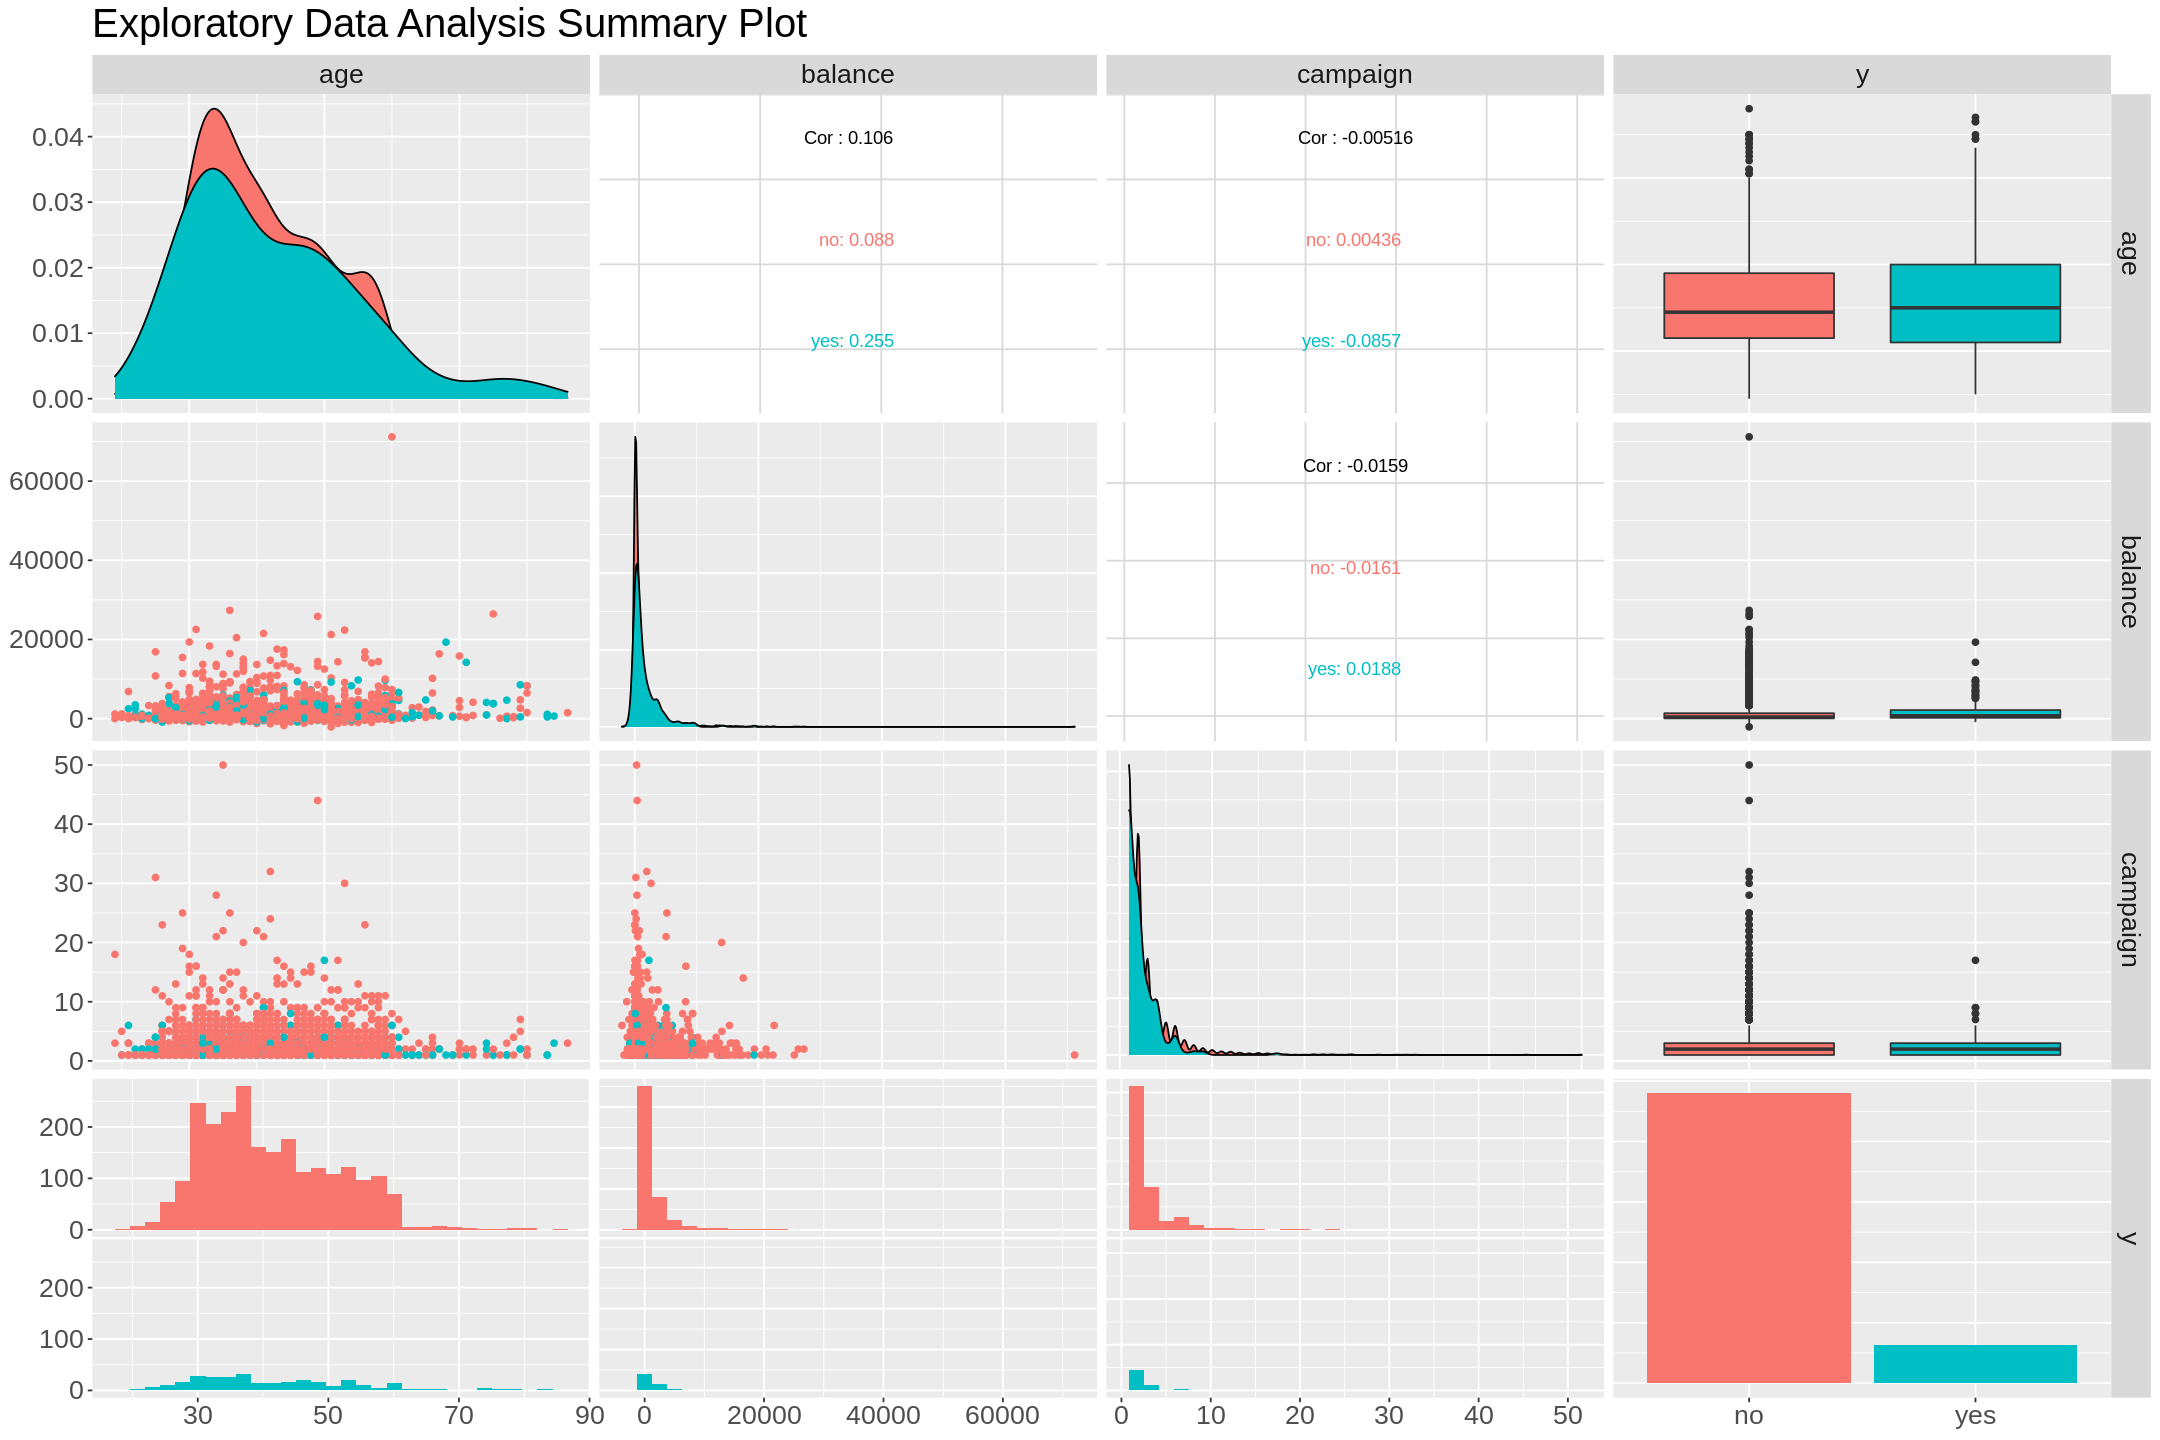

In [18]:
# make a matrix of plots with our data set to get a general pattern among the attributs that our project concerns about
options(repr.plot.width = 18, repr.plot.height = 12)
ggpairs(bank_train, aes(color = y), title = "Exploratory Data Analysis Summary Plot",
           lower = list(continuous = "points"), legends = T)+
    theme(text = element_text(size = 20))

> With the ggpairs() function, we display the patterns and relationships between all predictors and y. Based on the plot, we can see that there aren't any relationships across predictors. Besides, most data are concentrated on the lower end, with only a few on the higher end. 

For further data analysis, we create data frames (2.2 to 2.4) to summarize the data and suitable charts to visualize the data. Each data frame summarized the observation of each attribute. Then, we visualize data frames with bar charts and violin chart. Using a bar chart enables us to easily compare the different amounts. With a violin chart, we can easily visualize the density and distribution. 

## 2.2 “Age” V.S. ”Subscribed to a Term Deposit or not"

In [19]:
# summarize data about age 
bank_age <- bank_train %>%
    group_by(age,y) %>%
    summarise(n = n())
bank_age

`summarise()` regrouping output by 'age' (override with `.groups` argument)



age,y,n
<dbl>,<fct>,<int>
19,no,2
20,no,2
20,yes,1
21,no,5
21,yes,1
⋮,⋮,⋮
80,no,3
80,yes,1
83,yes,2


> We create a bar chart below, which shows the proportion of agreements of each age. By using a bar chart, we are able to compare the differences in "yes" proportion across ages. 

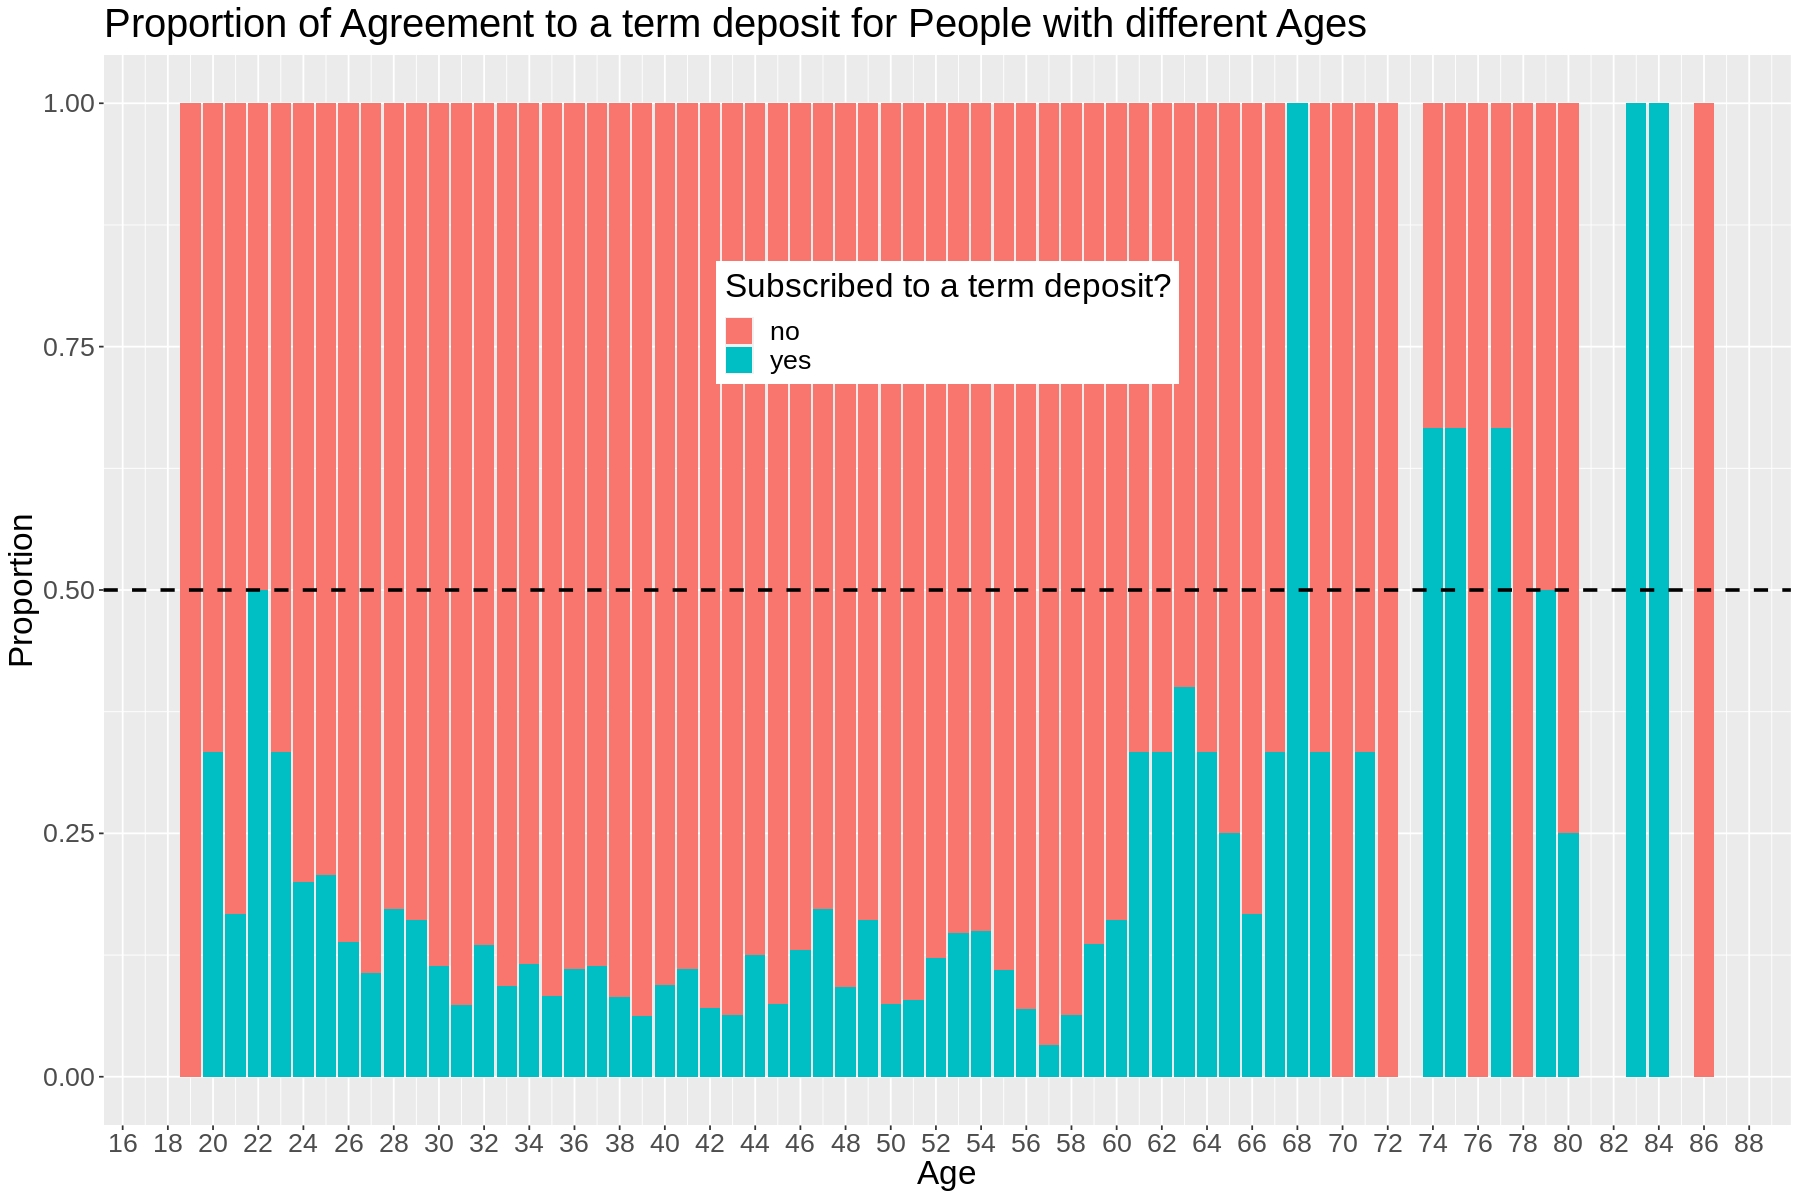

In [25]:
# plot the data as bar chart for better comparison
options(repr.plot.width = 15, repr.plot.height = 10)

age_bar_fill <- bank_age %>%
ggplot(aes(x = age, y = n, fill = y))+
geom_bar(stat = "identity", position = "fill")+
labs(x = "Age", y = "Proportion", 
     fill = "Subscribed to a term deposit?",
    title = "Proportion of Agreement to a term deposit for People with different Ages")+
theme(text = element_text(size = 20),legend.position = c(0.5, 0.75))+
scale_x_continuous(breaks = seq(0, 100, by = 2))+
geom_hline(yintercept = 0.5, linetype = "dashed", size = 1)
age_bar_fill

> From this graph we can see that 1) in general, the proportion of people who disagree to subscribe to a term deposit is higher 2) Teenagers and elderly have a higher proportion of agreement to a term deposit, with around 30% in 18-22 years old and 30%-70% in ages 65 or above. As such, we predict that a new client who is a teenager or an elderly is more likely to be classified as "yes" in our model. 

## 2.3 “Balance” V.S. ”Subscribed to a Term Deposit or not"

In [21]:
# summarize data about balance
bank_balance <- bank_train %>%
    group_by(balance,y) %>%
    summarize(balance,y)
bank_balance

`summarise()` regrouping output by 'balance', 'y' (override with `.groups` argument)



balance,y
<dbl>,<fct>
-2082,no
-1746,no
-1313,no
-1310,no
-1224,no
⋮,⋮
22546,no
25824,no
26452,no


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



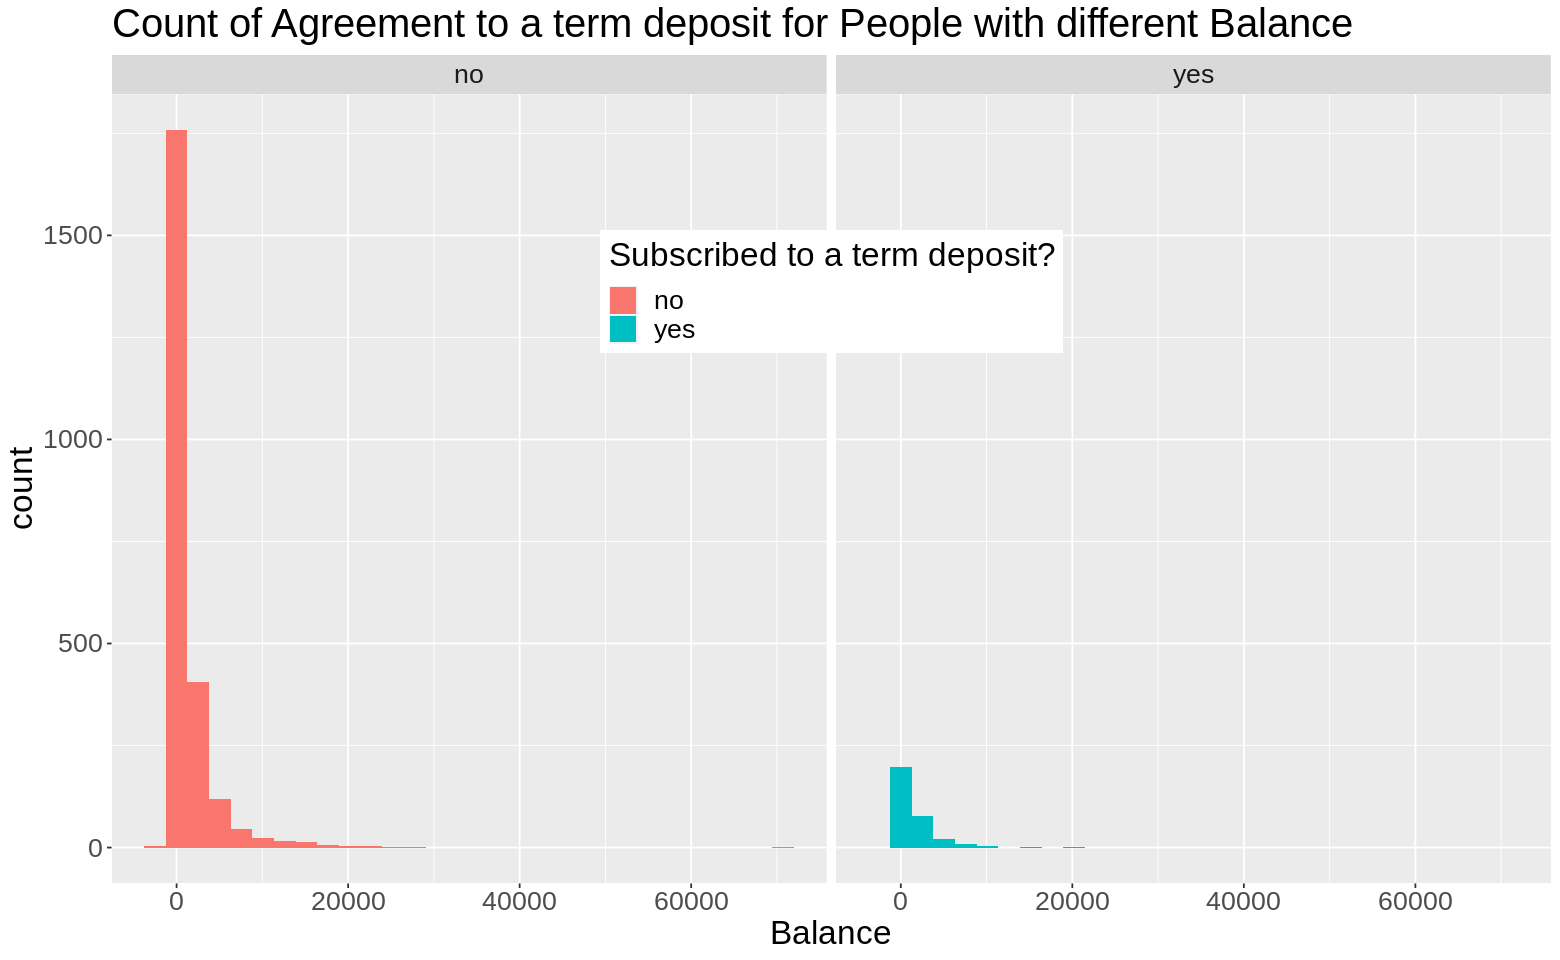

In [22]:
# plot the data as histogram for clearer comparison
options(repr.plot.width = 13, repr.plot.height = 8)

balance_histogram <- bank_balance %>%
    ggplot(aes(x = balance, fill = y))+
    geom_histogram(aes(x = balance, fill = y))+
    labs(x = "Balance", fill = "Subscribed to a term deposit?", 
         title = "Count of Agreement to a term deposit for People with different Balance")+
    theme(text = element_text(size = 20), legend.position = c(0.5, 0.75))+
    facet_grid(.~y)
balance_histogram

> A histogram is used to visualize people's bank balance. We use a histogram as it's the most suitable type to showcase the amount of a single variable. According to the graph, for those who subscribe to a term deposit, their balances are all below \\$20000. As a result, we predict that a client with more than$ $20000 balance will not be classified as "yes" with our classification model.

## 2.4 “Campaign” V.S. ”Subscribed to a Term Deposit or not"

In [23]:
# summarize data about campaigns
bank_campaign <- bank_train %>%
    group_by(campaign,y) %>%
    summarise(n = n())
bank_campaign

`summarise()` regrouping output by 'campaign' (override with `.groups` argument)



campaign,y,n
<dbl>,<fct>,<int>
1,no,892
1,yes,140
2,no,680
2,yes,87
3,no,295
⋮,⋮,⋮
30,no,1
31,no,1
32,no,1


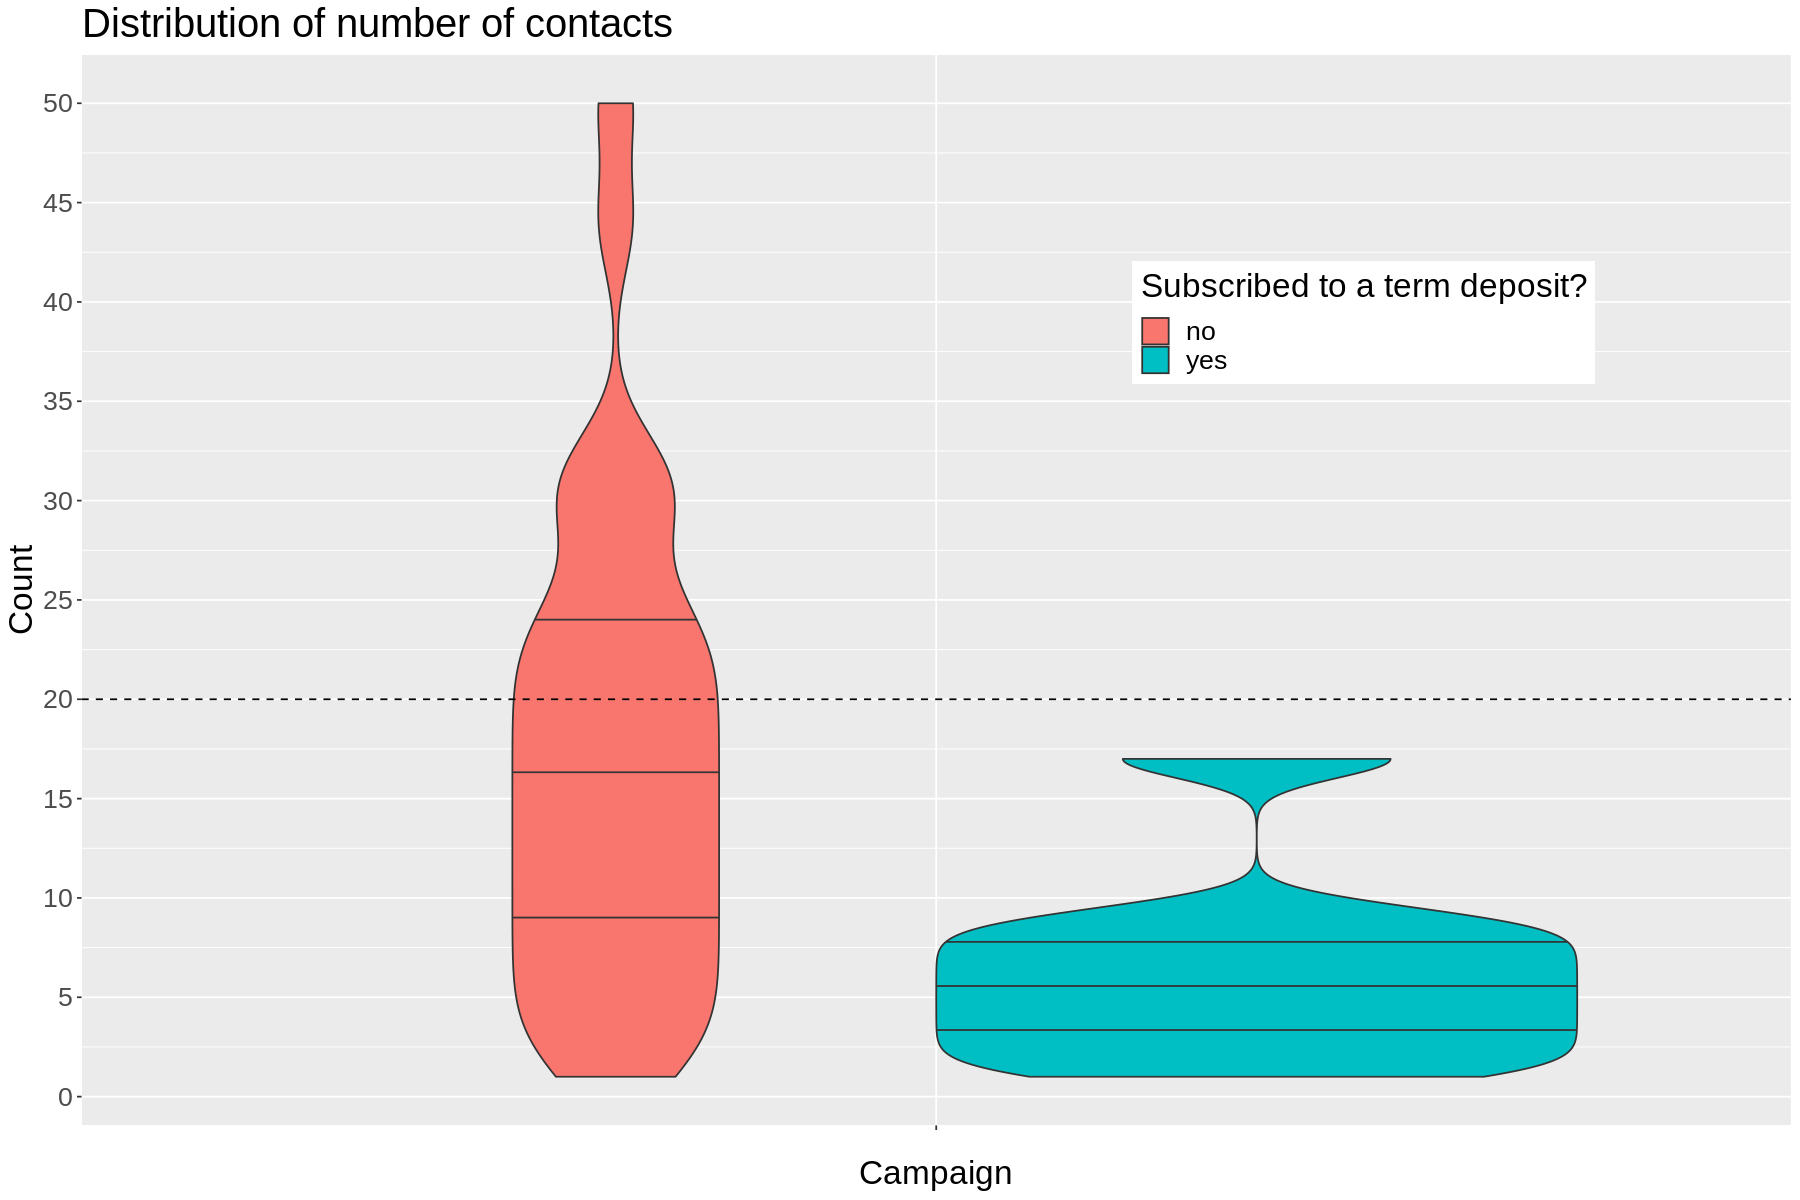

In [26]:
# create violin plot to visualize the distrubtion and density of the campaign attribute
campaign_violin <- bank_campaign %>%
    ggplot(aes(x ="",y= campaign, fill= y))+ 
    geom_violin(adjust = .5, draw_quantiles = c(0.25, 0.5, 0.75))+
    labs(x = "Campaign", y = "Count", fill = "Subscribed to a term deposit?", 
         title = "Distribution of number of contacts")+
    theme(text = element_text(size = 20), legend.position = c(0.75, 0.75))+
    scale_y_continuous(breaks = seq(0, 60, by = 5))+
    geom_hline(yintercept = 20, linetype = "dashed")
campaign_violin

> Among people who subscribe to the term deposit, they make the decision without much of contact. Most agree to do so with around 5 times of contact. It also shows that increasing the number of contacts won't increase the chance of the client's agreement to a term deposit. Based on the graph, even though some clients are contacted for over 25 times, they still reject to subscribe to a term deposit. As such, we predict that a client who is contacted more than 20 times will not be classified as "yes" in our classification model.

# **3. K-nn Classification**

## 3.1 Cross-Validation

In [14]:
set.seed(42)
# create recipe and perform data standardization
bank_recipe <- recipe(y ~ ., data = bank_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    step_upsample(y, over_ratio = 1, skip = TRUE)

# cross-validation
# create specification
bank_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# create a 5 folds cross-validation 
# as larger amount of data leads to longer processing time, we do 5 folds to decrease processing time
new_bank_vfold <- vfold_cv(bank_train, v = 5, strata = y) 

# create a dataframe that the neighbors variable containing each value from K = 1 - 15
k_vals <- tibble(neighbors = seq(1:15))

# evaluate classifier's accuracy
bank_results <- workflow() %>%
      add_recipe(bank_recipe) %>%
      add_model(bank_tune) %>%
      tune_grid(resamples = new_bank_vfold, grid = k_vals) %>%
        collect_metrics() %>%
        filter(.metric == "accuracy")
bank_results

Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7950575,5,0.008366524,Model01
2,accuracy,binary,0.7954265,5,0.007200330,Model02
3,accuracy,binary,0.7202368,5,0.006988568,Model03
4,accuracy,binary,0.7213417,5,0.006849710,Model04
5,accuracy,binary,0.6623684,5,0.006388514,Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,accuracy,binary,0.5868117,5,0.011576876,Model11
12,accuracy,binary,0.5868110,5,0.011088516,Model12
13,accuracy,binary,0.5750042,5,0.007893374,Model13


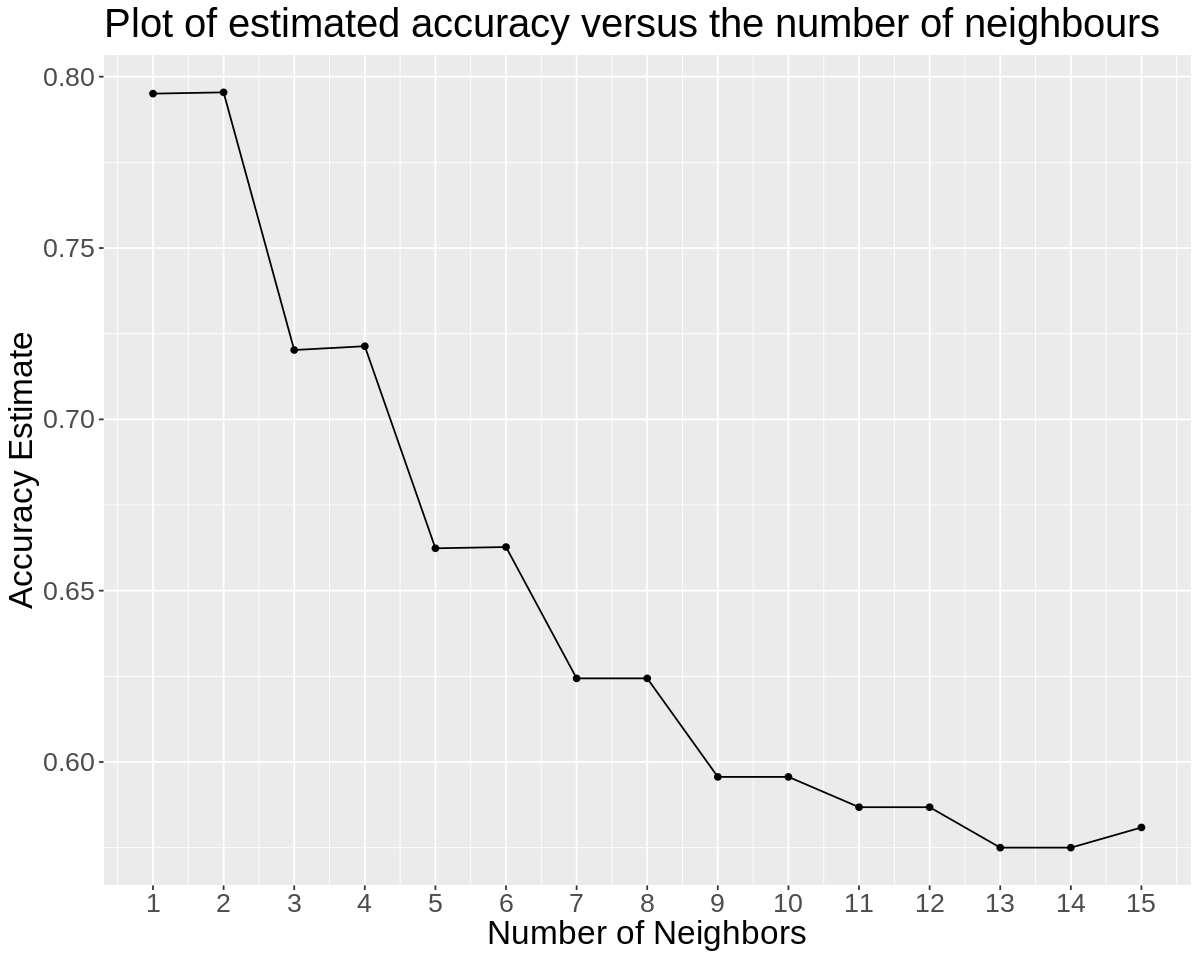

In [17]:
# plot of accuracy with different numbers of neighbours for parameter value selection (i.e. K)
options(repr.plot.width = 10, repr.plot.height = 8)
cross_val_plot <- ggplot(bank_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Number of Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 15, by = 1)) + # adjusting the x-axis
        ggtitle("Plot of estimated accuracy versus the number of neighbours") + 
        theme(text = element_text(size = 20))
cross_val_plot

> According to the graph, we choose K = 3. Firstly, it has a relatively high estimate accuracy, at around 72.5%, close to optimal estimate (80%). Secondly, it is an odd number, which prevents the case where half of the votes are yes while the other half is no. Since it's a small number, it will not require a big cost to train the model, so it is non-prohibitive. Lastly, changing the value to a nearby one (e.g. from K= 3 to 2 or 4) doesn’t decrease accuracy too much, which ensures that the model is reliable in the presence of uncertainty.

## 3.2 Improved Model and Accuracy

In [18]:
set.seed(42)
# re-train specification with choosen K
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
      set_engine("kknn") %>%
     set_mode("classification")

# fit the k-nn model
knn_fit <- workflow() %>%
      add_recipe(bank_recipe) %>%
      add_model(knn_spec) %>%
      fit(data = bank_train)

# test the model with testing set and evaluate accuracy of the model
bank_test_predictions <- predict(knn_fit, bank_test) %>%
      bind_cols(bank_test) %>%
      metrics(truth = y, estimate = .pred_class)
bank_test_predictions

bank_test_conf_met <- predict(knn_fit, bank_test) %>%
      bind_cols(bank_test) %>%
     conf_mat(truth = y, estimate = .pred_class)
bank_test_conf_met

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.73451327
kap,binary,0.06691897


          Truth
Prediction   no  yes
       no  1265  145
       yes  335   63

> WIth K = 3, the accuracy of the model is 73.5%. Based on the confusion matrix, it correctly predicts the instances of "yes" 63 times and the instances of "no" 1265 times. This indicates that there is room for improvement in the accuracy of our model.

## 3.3 New Observation Prediction

In [23]:
# predict a new observation - Case 1
set.seed(42)
new_observation <- tibble(age = 30, balance = 27500, campaign = 15)

new_obs_predicted <- predict(knn_fit, bank_data_selected)

final_knn_fit <- knn_fit %>%
    fit(data = bank_data_selected)

class_prediction <- predict(final_knn_fit, new_observation)
class_prediction

.pred_class
<fct>
no


> With a new observation of a client who is 30 years old, has a bank balance of $27500, and was contacted fifteen times during the marketing campaign, it belongs to the "no" class, which means that the client won't agree to subscribe to a term deposit. 

In [22]:
# predict a new observation - Case 2
set.seed(42)
new_observation <- tibble(age = 18, balance = 1700, campaign = 5)

new_obs_predicted <- predict(knn_fit, bank_data_selected)

final_knn_fit <- knn_fit %>%
    fit(data = bank_data_selected)

class_prediction <- predict(final_knn_fit, new_observation)
class_prediction

.pred_class
<fct>
yes


> With a new observation of a client who is 18 years old, has a bank balance of $1700, and was contacted five times during the marketing campaign, it belongs to the "yes" class, which means that the client will agree to subscribe to a term deposit. 

# **4. Methods**

This is a classification problem and we use the K-nn model as we want to classify who will and who won’t subscribe to a term deposit. The predictors we choose are age, balance, and campaign. 

The general rule of thumb of picking a split ratio is the larger the data set, the closer to a 50/50 split ratio. Since we have a large amount of data (around 4000 instances), we will split 60% for the training set, and 40% for the testing set, also following one of the most common split ratios. 

In order to solve the classification problem, we oversample the data by replicating the minority class in the data, which is “yes” in our case. Using this method ensures no loss of important information (Analytics Vidhya, 2016). 

# **5. Discussion**

## 5.1 Result Summary

The selected attributes are age, balance, and campaigns.

For Age, we discovered from the proportion plot that most of the clients who subscribed to a term deposit are relatively young and old, which means over 70% of the middle-aged people in our dataset are not willing to put their money in a term deposit. The reason why the proportion looks like this can be summarized as that younger and older people have more spare money than middle-agers. Most younger people have just worked a few years and usually have no real estate or vehicle mortgage. And most of the older people have paid off the mortgage and often have a considerable amount of savings. However, most middle-aged people are still paying their mortgage and may need to support their children or parents.

For Balance, we discovered from the plot and the dataset that most people who have a low or negative balance do not subscribe to a term deposit. Because a low or negative amount of balance could not support people to subscribe to a term deposit, people with a low but positive balance often will need the balance to support their daily lives, and people with a negative balance can not subscribe to a term deposit because they still owe money to the bank. However, for those who subscribe to a term deposit, their balance is all below \\$20,000. It is probably because people with over \\$20,000 balance will transform the money to another form like real estate or investment rather than subscribe to a term deposit.

For Campaign, we discovered from the plot that most people who subscribe to a term deposit did not receive too many contact times, and all of them decided to deposit within 17 contacts. So we could conclude that the chance of the client's agreement to a term deposit will not increase with the increase of the number of contacts the agents make. If the customer wants to deposit, they do not need many contacts to finalize the deal as several contacts are enough to let the customer know the term deposit's main features, such as interest rate and deposit term. If the customer does not want to deposit, it is useless to contact them numerous times.

For K-nn classification, with a 5-fold cross-validation and 3 neighbours, our model has an accuracy of 73.5% and predicts “yes” correctly 63 times out of 208 “yes” classes. 

Our answer to the question "Who are most likely to subscribe to a term deposit?" are those who are young or old, have less than \\$20,000 balance, and contacted less than 5 times.

## 5.2 Expectation and New Observations Results

We expected that those who are in their old ages, have a significant amount of balance, and have been contacted by the agents not many times are the ones who are most likely to subscribe to a term deposit.

The result shows that both younger and older people take a greater proportion in subscribing to a term deposit. Moreover, we were right about the number of contacts, where increasing the number of contacts doesn’t increase the likelihood of agreement. However, we did not expect all those who subscribe to a term deposit to have a balance below \\$20,000 as we assume that those who are wealthier will have more spare money to do so.

Our new observations prediction supports our results. A 30 years old client, with \\$27500 balance and contacted 15 times is predicted to disagree to subscribe to a term deposit. While a 18 years old client, with \\$1700 balance and contacted 5 times is predicted to agree to subscribe to a term deposit. 

## 5.3 Limitations

Although there are other better predictors, such as job and marital condition, we are limited by the k-nn classification method where it relies on calculating the distance between observations. With the K-nn method requiring numerical variables and these better predictors all being categorical variables, we are unable to utilize them in the data analysis.

Another limitation of our model is in section 2.2 Age. We conclude from the proportion graph where younger and older people have a higher proportion of agreement. However, our sample was mainly taken from middle-aged people and the sample size of younger and older people are not as big as the middle-age. So, the distribution is only partially accurate as some ages may have similar absolute counts but very different proportions due to differences in sample size. 

## 5.4 Impact

As there are many diverse financial products available in the market, banks should focus on those who are most likely to subscribe to a term deposit. With our findings, banks would be able to find out their target customer group for term deposits and tailor their future marketing strategies in accordance. 

## 5.5 Further Questions

“Why are these customer groups more likely to subscribe to the term deposit?”

“How could the bank use their marketing strategies to encourage other customer groups to agree to subscribe to the term deposit?”

# **6. References**

Analytics Vidhya. (2016, March 28). *Practical guide to deal with imbalanced classification problems in R.* https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/.

Chen, J. (2021, August 29). *Term deposit.* Investopedia. https://www.investopedia.com/terms/t/termdeposit.asp. 

S. Moro, P. Cortez and P. Rita. (2014, June). A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, *Elsevier*, 62:22-31. doi:doi.org/10.1016/j.dss.2014.03.001.